# train data 만들기

### 영화 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('c:/3rd_project/data/images/movie/[메인장르_주요색상_임베딩] 영화포스터(2011.01-2023.07).xlsx', engine='openpyxl')
df.head(5)

,idx,영화명,개봉일,등급,장르,대표국적,줄거리,이미지,메인장르,color1,color2,color3,embedding1,embedding2,embedding3
0,4658,잃어버린 마법의 섬 홋타라케,2011-01-02,전체관람가,애니메이션,일본,당신이 잃어버린 물건이 이 섬에 있어요!'고교생인 하루카(遙)는 어릴 때 돌아가신 ...,https://image.tmdb.org/t/p/original/5dwqy4Sawp...,애니메이션,[255 255 255],[ 0 153 210],[17 14 21],애니메이션,애니메이션,애니메이션
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,2011-01-05,전체관람가,애니메이션,일본,멸망한 아틀란티스를 부활시키고 지구를 구하려는 소년들이 악인들과 맞써 싸우는 모험과...,https://image.tmdb.org/t/p/original/laZBDBf0WO...,애니메이션,[25 21 20],[251 251 251],[135 134 129],애니메이션,애니메이션,애니메이션
2,4661,동자 대소동,2011-01-05,전체관람가,"가족,코미디",한국,초등학교에서 말썽꾸러기인 동자와 친구들은 예절 교육을 받기 위해 예절 학교로 가게 ...,https://image.tmdb.org/t/p/original/yURf9IfjoC...,코미디,[30 39 20],[103 48 27],[255 255 255],드라마,액션,액션
3,4662,심장이 뛴다,2011-01-05,15세이상관람가,드라마,한국,"심장은 하나, 살려야 할 사람은 둘. 당신이라면 어떻게 하겠어?한 중년 여성이 뇌사...",https://image.tmdb.org/t/p/original/eIjQUq8Tbr...,드라마,[161 102 58],[0 0 0],[255 255 255],드라마,-,드라마
4,4663,내 친구의 소원,2011-01-06,15세이상관람가,"코미디,드라마",영국,"나만 알고 있는 (내 친구의 소원)리버풀에 사는 단짝친구인 지기와 로비, 엄마와 단...",https://image.tmdb.org/t/p/original/bAWWN79s1e...,코미디,[255 255 255],[37 27 18],[238 43 49],-,드라마,공포(호러)


### 이미지 데이터 불러오기

In [3]:
X = np.load('c:/3rd_project/data/images/movie/X_total_color.npy')
y = np.load('c:/3rd_project/data/images/movie/y_total_color.npy')

In [4]:
print(len(X))
print(len(y))

7005
7005


In [5]:
print(X[0])
print(y[0])

[[[245 255 255]
  [242 252 254]
  [246 255 255]
  ...
  [250 250 252]
  [254 255 255]
  [254 255 255]]

 [[194 217 231]
  [197 220 233]
  [194 216 229]
  ...
  [245 245 247]
  [240 241 243]
  [238 239 241]]

 [[193 217 227]
  [193 217 228]
  [194 216 227]
  ...
  [250 249 254]
  [249 250 252]
  [241 242 244]]

 ...

 [[241 242 244]
  [241 242 244]
  [241 242 244]
  ...
  [239 240 242]
  [240 240 242]
  [240 240 242]]

 [[241 242 244]
  [241 242 244]
  [241 242 244]
  ...
  [239 240 242]
  [240 240 242]
  [240 240 242]]

 [[241 242 244]
  [241 242 244]
  [241 242 244]
  ...
  [239 240 242]
  [240 240 242]
  [240 240 242]]]
애니메이션


In [6]:
genre =y[0]
name = df.iloc[0]['영화명']
# img_name = f"{genre}_{name}"

print(genre)
print(name)
# print(img_name)

애니메이션
잃어버린 마법의 섬 홋타라케


### 함수 선언

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

def show_origin(img):   # 원본 이미지, 크기 출력
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

    print(img_rgb.shape)

def color_hist(img):    # 원본 이미지 색 히스토그램 출력
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 그레이 이미지의 0번 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

    # RGB 이미지의 각 채널에 대한 히스토그램 계산
    hist_b = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])
    hist_r = cv2.calcHist([img_rgb], [2], None, [256], [0, 256])

    # 히스토그램 시각화
    plt.figure(figsize=(8, 6))
    plt.title('Color Histogram')
    plt.xlabel('Color Value')
    plt.ylabel('Frequency')

    # 그레이 히스토그램 채우기
    plt.fill_between(range(256), hist.flatten(), color='k', alpha=0.4, label='Histogram')

    # RGB 채널 히스토그램 그래프 그리기
    plt.plot(hist_b, color='b', label='Blue Channel')
    plt.plot(hist_g, color='g', label='Green Channel')
    plt.plot(hist_r, color='r', label='Red Channel')

    plt.xlim([0, 256])
    plt.legend()
    plt.show()

def brightness(img):   # 원본 이미지 밝기 계산
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(image, (500, 750))  # (가로, 세로)

    brightness_value = round(img.mean() / 255 , 4)
    # print(f"이미지 밝기 : {brightness_value}")

    return brightness_value

def main_5_color(img):  # 원본 이미지 대표 색상 5개 rgb 값 반환
    main_5_color_list = []

    # 이미지 데이터를 1차원 배열로 변환
    img_flat = img.reshape((-1, 3))

    # K-means 클러스터링 모델 생성
    kmeans = KMeans(n_clusters=5)

    # 클러스터링 수행
    kmeans.fit(img_flat)

    # 클러스터 중심을 얻어오고 이를 정수로 변환
    colors = kmeans.cluster_centers_.astype(int)

    # BGR에서 RGB로 변환
    colors_rgb = colors[:, [2, 1, 0]]

    # 주요 색상 출력
    # print("주요 색상 (RGB):")
    for color in colors_rgb:
        # print(color)
        main_5_color_list.append(color)

    # 색상 팔레트 생성
    # color_palette = np.zeros((50, 120, 3), dtype=np.uint8)
    # for i, color in enumerate(colors_rgb):
    #     color_palette[:, i * 40:(i + 1) * 40, :] = color

    # 이미지 표시
    # plt.imshow(color_palette)
    # plt.axis('off')
    # plt.show()

    return main_5_color_list

In [8]:
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt
import cv2
# import tensorflow as tf

def image_sagmentation(img):   # 이미지 segmentation으로 개체 분류
    '''
    모델 호출
    '''
    # new_model = YOLO('c:/3rd_project/runs/segment/train10/weights/best.pt')   # Mask 모델
    new_model = YOLO('c:/3rd_project/yolov8_pt/230928_new_best.pt')   # Mask 모델
    # new_model = YOLO('c:/3rd_project/yolov8_pt/yolov8n-seg.pt')   # Mask 모델

    '''
    이미지 적용
    '''
    # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image = cv2.resize(img, (320, 448))  # (가로, 세로)
    results = list(new_model.predict(source=image,
                                    conf=0.3, show=False, stream=True))
    #                                 예측률0.5초과                      detect할 클래스만 classes=[0, 2, ...] 추가
    #                                                                   없는 경우 생략

    '''
    이미지 출력
    '''
    # res_plotted = results[0].plot()
    # plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))
    # cv2.waitKey()
    # cv2.destroyAllWindows()
    # plt.axis('off')
    # plt.show()

    '''
    개체 수 출력
    '''
    # gpu => cpu
    cls_cpu = results[0].boxes.cls.to('cpu').to(int)
    # cpu => list
    cls_list = cls_cpu.tolist()

    from collections import Counter

    cls_counts = Counter(cls_list)
    # print(cls_counts)

    # 클래스 이름과 개수를 연결하는 딕셔너리 생성
    class_names = {
        new_model.names[class_idx]: str(count)
        for class_idx, count in cls_counts.items()
    }

    # 모든 키-값 쌍을 반복하고 출력
    # for class_name, class_value in class_names.items():
    #     print(f"Class: {class_name}\t\tValue: {class_value}")

    model_classes = new_model.names.items()
    
    return class_names, model_classes

### 이미지 적용

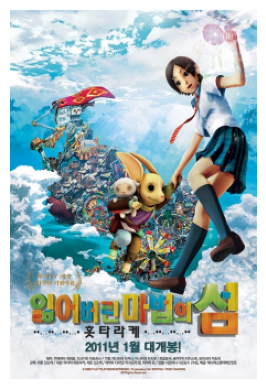

(336, 224, 3)


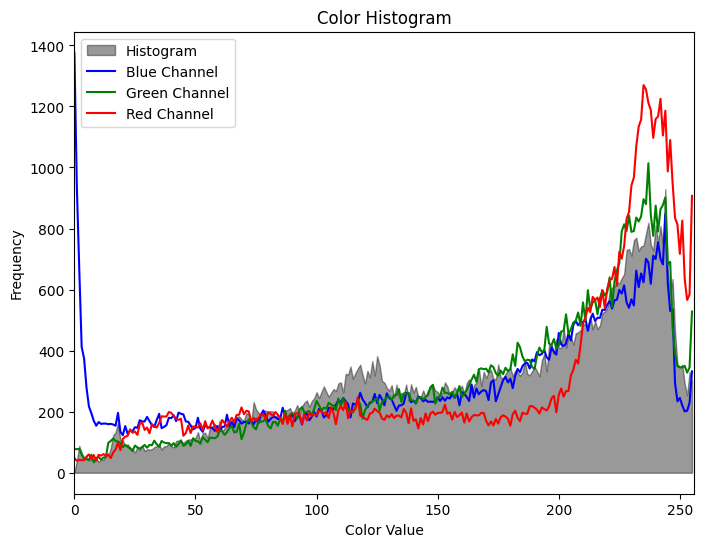


0: 448x320 1 person, 59.7ms
Speed: 3.0ms preprocess, 59.7ms inference, 6.0ms postprocess per image at shape (1, 3, 448, 320)


In [9]:
import cv2
from matplotlib import pyplot as plt
import imutils
from imutils.perspective import four_point_transform

img_path = 'c:/3rd_project/data/images/movie/action/129.jpg'
# img = cv2.imread(X[0])

rgb_image = cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB)
# gray_image = cv2.cvtColor(X[0], cv2.COLOR_GRAYSCALE)

# # NumPy 배열을 이미지로 표시
# cv2.imshow('Image', rgb_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

show_origin(rgb_image)

color_hist(rgb_image)

brightness_value = brightness(rgb_image)

main_5_color_list = main_5_color(rgb_image)

i_s = image_sagmentation(rgb_image)

In [10]:
print(brightness_value)
print(main_5_color_list)
print(i_s)

0.66
[array([225, 232, 237]), array([157, 129,  90]), array([156, 192, 205]), array([ 44, 145, 172]), array([43, 58, 63])]
({'person': '1'}, dict_items([(0, 'airplane'), (1, 'apple'), (2, 'backpack'), (3, 'banana'), (4, 'baseball bat'), (5, 'baseball glove'), (6, 'bear'), (7, 'bed'), (8, 'bench'), (9, 'bicycle'), (10, 'bird'), (11, 'boat'), (12, 'book'), (13, 'bottle'), (14, 'bowl'), (15, 'broccoli'), (16, 'bus'), (17, 'cake'), (18, 'car'), (19, 'carrot'), (20, 'cat'), (21, 'cell phone'), (22, 'chair'), (23, 'clock'), (24, 'couch'), (25, 'cow'), (26, 'cup'), (27, 'dining table'), (28, 'dog'), (29, 'donut'), (30, 'elephant'), (31, 'fire hydrant'), (32, 'fork'), (33, 'frisbee'), (34, 'giraffe'), (35, 'hair drier'), (36, 'handbag'), (37, 'horse'), (38, 'hot dog'), (39, 'keyboard'), (40, 'kite'), (41, 'knife'), (42, 'laptop'), (43, 'microwave'), (44, 'motorcycle'), (45, 'mouse'), (46, 'orange'), (47, 'oven'), (48, 'parking meter'), (49, 'person'), (50, 'pizza'), (51, 'potted plant'), (52, 

In [11]:
main_5_color_list[0].tolist()

[225, 232, 237]

In [12]:
# i_s[1]에서 클래스 이름 추출
class_names = [class_name for _, class_name in i_s[1]]

# 클래스 이름 리스트 출력
print(class_names)

['airplane', 'apple', 'backpack', 'banana', 'baseball bat', 'baseball glove', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat', 'book', 'bottle', 'bowl', 'broccoli', 'bus', 'cake', 'car', 'carrot', 'cat', 'cell phone', 'chair', 'clock', 'couch', 'cow', 'cup', 'dining table', 'dog', 'donut', 'elephant', 'fire hydrant', 'fork', 'frisbee', 'giraffe', 'hair drier', 'handbag', 'horse', 'hot dog', 'keyboard', 'kite', 'knife', 'laptop', 'microwave', 'motorcycle', 'mouse', 'orange', 'oven', 'parking meter', 'person', 'pizza', 'potted plant', 'refrigerator', 'remote', 'sandwich', 'scissors', 'sheep', 'sink', 'skateboard', 'skis', 'snowboard', 'spoon', 'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear', 'tennis racket', 'tie', 'toaster', 'toilet', 'toothbrush', 'traffic light', 'train', 'truck', 'tv', 'umbrella', 'vase', 'wine glass', 'zebra', 'gun']


In [ ]:
df.columns[:]

Index(['idx', '영화명', '개봉일', '등급', '장르', '대표국적', '줄거리', '이미지', '메인장르', 'color1',
       'color2', 'color3', 'embedding1', 'embedding2', 'embedding3'],
      dtype='object')

In [13]:
columns = class_names.copy()  # class_names 리스트를 복사하여 columns 변수에 할당

# 'name'을 'columns' 리스트의 맨 앞에 추가
columns.insert(0, 'img_name')
columns.insert(0, 'idx')

# 'genre'을 'columns' 리스트의 끝에 추가
columns.extend(['brightness', 'color_1_r', 'color_1_g', 'color_1_b',
                'color_2_r', 'color_2_g', 'color_2_b',
                'color_3_r','color_3_g', 'color_3_b',
                'color_4_r','color_4_g', 'color_4_b', 
                'color_5_r','color_5_g', 'color_5_b','genre'])

In [15]:
print(columns)
print(len(columns))

['idx', 'img_name', 'airplane', 'apple', 'backpack', 'banana', 'baseball bat', 'baseball glove', 'bear', 'bed', 'bench', 'bicycle', 'bird', 'boat', 'book', 'bottle', 'bowl', 'broccoli', 'bus', 'cake', 'car', 'carrot', 'cat', 'cell phone', 'chair', 'clock', 'couch', 'cow', 'cup', 'dining table', 'dog', 'donut', 'elephant', 'fire hydrant', 'fork', 'frisbee', 'giraffe', 'hair drier', 'handbag', 'horse', 'hot dog', 'keyboard', 'kite', 'knife', 'laptop', 'microwave', 'motorcycle', 'mouse', 'orange', 'oven', 'parking meter', 'person', 'pizza', 'potted plant', 'refrigerator', 'remote', 'sandwich', 'scissors', 'sheep', 'sink', 'skateboard', 'skis', 'snowboard', 'spoon', 'sports ball', 'stop sign', 'suitcase', 'surfboard', 'teddy bear', 'tennis racket', 'tie', 'toaster', 'toilet', 'toothbrush', 'traffic light', 'train', 'truck', 'tv', 'umbrella', 'vase', 'wine glass', 'zebra', 'gun', 'brightness', 'color_1_r', 'color_1_g', 'color_1_b', 'color_2_r', 'color_2_g', 'color_2_b', 'color_3_r', 'color_

### 빈 데이터프레임 생성

In [16]:
import pandas as pd

new_df = pd.DataFrame(columns=columns)
new_df

,idx,img_name,airplane,apple,backpack,banana,baseball bat,baseball glove,bear,bed,...,color_3_r,color_3_g,color_3_b,color_4_r,color_4_g,color_4_b,color_5_r,color_5_g,color_5_b,genre


In [17]:
len(X)

7005

In [18]:
print(brightness_value)
print(main_5_color_list)

0.66
[array([225, 232, 237]), array([157, 129,  90]), array([156, 192, 205]), array([ 44, 145, 172]), array([43, 58, 63])]


In [21]:
df.iloc[0]['idx']

4658

In [27]:
color_1 = main_5_color_list[0].tolist()
color_2 = main_5_color_list[1].tolist()
color_3 = main_5_color_list[2].tolist()
color_4 = main_5_color_list[3].tolist()
color_5 = main_5_color_list[4].tolist()

for i in range(1):
    new_df.loc[i, 'idx'] = df.iloc[i]['idx']
    new_df.loc[i, 'img_name'] = name
    for key, value in i_s[0].items():
        new_df.loc[i, 'brightness'] = brightness_value
        new_df.loc[i, 'color_1_r'] = color_1[0]
        new_df.loc[i, 'color_1_g'] = color_1[1]
        new_df.loc[i, 'color_1_b'] = color_1[2]
        new_df.loc[i, 'color_2_r'] = color_2[0]
        new_df.loc[i, 'color_2_g'] = color_2[1]
        new_df.loc[i, 'color_2_b'] = color_2[2]
        new_df.loc[i, 'color_3_r'] = color_3[0]
        new_df.loc[i, 'color_3_g'] = color_3[1]
        new_df.loc[i, 'color_3_b'] = color_3[2]
        new_df.loc[i, 'color_4_r'] = color_4[0]
        new_df.loc[i, 'color_4_g'] = color_4[1]
        new_df.loc[i, 'color_4_b'] = color_4[2]
        new_df.loc[i, 'color_5_r'] = color_5[0]
        new_df.loc[i, 'color_5_g'] = color_5[1]
        new_df.loc[i, 'color_5_b'] = color_5[2]
        new_df.loc[i, 'genre'] = genre
        if key in df.columns:
            new_df.loc[i, key] = value
            print(key)
            print(value)

In [28]:
new_df = new_df.fillna(0)
new_df

,idx,img_name,airplane,apple,backpack,banana,baseball bat,baseball glove,bear,bed,...,color_3_r,color_3_g,color_3_b,color_4_r,color_4_g,color_4_b,color_5_r,color_5_g,color_5_b,genre
0,4658,잃어버린 마법의 섬 홋타라케,0,0,0,0,0,0,0,0,...,156,192,205,44,145,172,43,58,63,애니메이션


In [29]:
new_df['brightness']

0    0.66
Name: brightness, dtype: float64

In [25]:
new_df[new_df.columns[-13:]]

,color_2_r,color_2_g,color_2_b,color_3_r,color_3_g,color_3_b,color_4_r,color_4_g,color_4_b,color_5_r,color_5_g,color_5_b,genre
0,157,129,90,156,192,205,44,145,172,43,58,63,애니메이션


액션 폴더 파일 리스트 가져오기

In [ ]:
# import os

# folder_path = 'c:/3rd_project/data/images/movie/action'
# files = os.listdir(folder_path)

# print(files)
# print(len(files))

In [ ]:
# img_path = 'c:/3rd_project/data/images/movie/action/164.jpg'
# img = cv2.imread(img_path)

# brightness = brightness(img_path)

# main_3_color = main_3_color(img)

# i_s = image_sagmentation(img_path)

In [ ]:
# # i_s[1]에서 클래스 이름 추출
# class_names = [class_name for _, class_name in i_s[1]]

# columns = class_names.copy()  # class_names 리스트를 복사하여 columns 변수에 할당

# # 'name'을 'columns' 리스트의 맨 앞에 추가
# columns.insert(0, 'img_name')

# # 'genre'을 'columns' 리스트의 끝에 추가
# columns.extend(['brightness', 'color_1_r', 'color_1_g', 'color_1_b',
#                 'color_2_r', 'color_2_g', 'color_2_b',
#                 'color_3_r','color_3_g', 'color_3_b','genre'])


# df = pd.DataFrame(columns=columns)
# df

In [ ]:
len(df)

In [30]:
import cv2
from matplotlib import pyplot as plt
import imutils
from imutils.perspective import four_point_transform
from tqdm import tqdm
import pandas as pd

for i in tqdm(range(len(df))):
    rgb_image = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)

    brightness_value = brightness(rgb_image)
    main_5_color_list = main_5_color(rgb_image)
    i_s = image_sagmentation(rgb_image)

    color_1 = main_5_color_list[0].tolist()
    color_2 = main_5_color_list[1].tolist()
    color_3 = main_5_color_list[2].tolist()
    color_4 = main_5_color_list[3].tolist()
    color_5 = main_5_color_list[4].tolist()

    genre =y[i]
    name = df.iloc[i]['영화명']
    idx = df.iloc[i]['idx']

    new_df.loc[i, 'idx'] = idx
    new_df.loc[i, 'img_name'] = name
    for key, value in i_s[0].items():
        new_df.loc[i, 'brightness'] = brightness_value
        new_df.loc[i, 'color_1_r'] = round(color_1[0] / 255, 4)
        new_df.loc[i, 'color_1_g'] = round(color_1[1] / 255, 4)
        new_df.loc[i, 'color_1_b'] = round(color_1[2] / 255, 4)
        new_df.loc[i, 'color_2_r'] = round(color_2[0] / 255, 4)
        new_df.loc[i, 'color_2_g'] = round(color_2[1] / 255, 4)
        new_df.loc[i, 'color_2_b'] = round(color_2[2] / 255, 4)
        new_df.loc[i, 'color_3_r'] = round(color_3[0] / 255, 4)
        new_df.loc[i, 'color_3_g'] = round(color_3[1] / 255, 4)
        new_df.loc[i, 'color_3_b'] = round(color_3[2] / 255, 4)
        new_df.loc[i, 'color_4_r'] = round(color_4[0] / 255, 4)
        new_df.loc[i, 'color_4_g'] = round(color_4[1] / 255, 4)
        new_df.loc[i, 'color_4_b'] = round(color_4[2] / 255, 4)
        new_df.loc[i, 'color_5_r'] = round(color_5[0] / 255, 4)
        new_df.loc[i, 'color_5_g'] = round(color_5[1] / 255, 4)
        new_df.loc[i, 'color_5_b'] = round(color_5[2] / 255, 4)
        new_df.loc[i, 'genre'] = genre
        if key in new_df.columns:
            new_df.loc[i, key] = value

new_df = new_df.fillna(0)
new_df.to_csv('c:/3rd_project/data/Train/movie_data_231005.csv', index=None)

  0%|          | 0/7005 [00:00<?, ?it/s]
0: 448x320 1 person, 2.6ms
Speed: 16.1ms preprocess, 2.6ms inference, 13.0ms postprocess per image at shape (1, 3, 448, 320)
  0%|          | 1/7005 [00:00<1:40:28,  1.16it/s]
0: 448x320 1 teddy bear, 14.9ms
Speed: 0.0ms preprocess, 14.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 320)
  0%|          | 2/7005 [00:01<1:41:55,  1.15it/s]
0: 448x320 1 cell phone, 4 persons, 15.6ms
Speed: 0.0ms preprocess, 15.6ms inference, 5.0ms postprocess per image at shape (1, 3, 448, 320)
  0%|          | 3/7005 [00:02<1:37:22,  1.20it/s]
0: 448x320 (no detections), 15.6ms
Speed: 0.0ms preprocess, 15.6ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 320)
  0%|          | 4/7005 [00:03<1:26:02,  1.36it/s]
0: 448x320 3 persons, 1 stop sign, 29.6ms
Speed: 17.7ms preprocess, 29.6ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 320)
  0%|          | 5/7005 [00:03<1:23:00,  1.41it/s]
0: 448x320 1 teddy bear, 12.4ms
Speed:

In [31]:
new_df

,idx,img_name,airplane,apple,backpack,banana,baseball bat,baseball glove,bear,bed,...,color_3_r,color_3_g,color_3_b,color_4_r,color_4_g,color_4_b,color_5_r,color_5_g,color_5_b,genre
0,4658.0,잃어버린 마법의 섬 홋타라케,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8824,0.9098,0.9294,0.1725,0.2275,0.2471,0.6196,0.5098,0.3529,애니메이션
1,4660.0,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,0,0,0,0,0,0,0,0,...,0.6784,0.2275,0.1725,0.4392,0.4627,0.5686,0.8314,0.6039,0.3098,애니메이션
2,4661.0,동자 대소동,0,0,0,0,0,0,0,0,...,0.9490,0.8941,0.8471,0.7529,0.4078,0.2706,0.4392,0.2941,0.2196,코미디
3,4662.0,심장이 뛴다,0,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
4,4663.0,내 친구의 소원,0,0,0,0,0,0,0,0,...,0.2549,0.1451,0.1333,0.8314,0.2235,0.2118,0.8863,0.7294,0.6078,코미디
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,18416.0,붉은 사막,0,0,0,0,0,0,0,0,...,0.9059,0.6588,0.5020,0.8784,0.2118,0.1294,0.3804,0.1529,0.1255,드라마
7001,18417.0,비닐하우스,0,0,0,0,0,0,0,0,...,0.0706,0.0588,0.0941,0.4431,0.3451,0.4471,0.5765,0.4627,0.6157,-
7002,18418.0,에고이스트,0,0,0,0,0,0,0,0,...,0.0392,0.2000,0.3176,0.3804,0.2902,0.1961,0.6196,0.5020,0.4000,드라마
7003,18419.0,핑크퐁 시네마 콘서트3 : 진저브레드맨을 잡아라,0,0,0,0,0,0,0,0,...,0.3373,0.8196,0.9569,0.8706,0.9412,0.9373,0.8549,0.7176,0.2902,애니메이션


In [32]:
new_df.columns[-16:-1]

Index(['color_1_r', 'color_1_g', 'color_1_b', 'color_2_r', 'color_2_g',
       'color_2_b', 'color_3_r', 'color_3_g', 'color_3_b', 'color_4_r',
       'color_4_g', 'color_4_b', 'color_5_r', 'color_5_g', 'color_5_b'],
      dtype='object')

In [44]:
new_df['idx'] = new_df['idx'].astype('int64')
for col in new_df.columns[2:83]:
    new_df[col] = new_df[col].astype('int64')

In [45]:
new_df

,idx,img_name,airplane,apple,backpack,banana,baseball bat,baseball glove,bear,bed,...,color_3_r,color_3_g,color_3_b,color_4_r,color_4_g,color_4_b,color_5_r,color_5_g,color_5_b,genre
0,4658,잃어버린 마법의 섬 홋타라케,0,0,0,0,0,0,0,0,...,0.8824,0.9098,0.9294,0.1725,0.2275,0.2471,0.6196,0.5098,0.3529,애니메이션
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,0,0,0,0,0,0,0,0,...,0.6784,0.2275,0.1725,0.4392,0.4627,0.5686,0.8314,0.6039,0.3098,애니메이션
2,4661,동자 대소동,0,0,0,0,0,0,0,0,...,0.9490,0.8941,0.8471,0.7529,0.4078,0.2706,0.4392,0.2941,0.2196,코미디
3,4662,심장이 뛴다,0,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
4,4663,내 친구의 소원,0,0,0,0,0,0,0,0,...,0.2549,0.1451,0.1333,0.8314,0.2235,0.2118,0.8863,0.7294,0.6078,코미디
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,18416,붉은 사막,0,0,0,0,0,0,0,0,...,0.9059,0.6588,0.5020,0.8784,0.2118,0.1294,0.3804,0.1529,0.1255,드라마
7001,18417,비닐하우스,0,0,0,0,0,0,0,0,...,0.0706,0.0588,0.0941,0.4431,0.3451,0.4471,0.5765,0.4627,0.6157,-
7002,18418,에고이스트,0,0,0,0,0,0,0,0,...,0.0392,0.2000,0.3176,0.3804,0.2902,0.1961,0.6196,0.5020,0.4000,드라마
7003,18419,핑크퐁 시네마 콘서트3 : 진저브레드맨을 잡아라,0,0,0,0,0,0,0,0,...,0.3373,0.8196,0.9569,0.8706,0.9412,0.9373,0.8549,0.7176,0.2902,애니메이션


In [46]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7005 entries, 0 to 7004
Data columns (total 100 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   idx             7005 non-null   int64  
 1   img_name        7005 non-null   object 
 2   airplane        7005 non-null   int64  
 3   apple           7005 non-null   int64  
 4   backpack        7005 non-null   int64  
 5   banana          7005 non-null   int64  
 6   baseball bat    7005 non-null   int64  
 7   baseball glove  7005 non-null   int64  
 8   bear            7005 non-null   int64  
 9   bed             7005 non-null   int64  
 10  bench           7005 non-null   int64  
 11  bicycle         7005 non-null   int64  
 12  bird            7005 non-null   int64  
 13  boat            7005 non-null   int64  
 14  book            7005 non-null   int64  
 15  bottle          7005 non-null   int64  
 16  bowl            7005 non-null   int64  
 17  broccoli        7005 non-null   int64

In [47]:
new_df.to_csv('c:/3rd_project/data/Train/movie_data_231005.csv', index=None)

In [48]:
df.head(2)

,idx,영화명,개봉일,등급,장르,대표국적,줄거리,이미지,메인장르,color1,color2,color3,embedding1,embedding2,embedding3
0,4658,잃어버린 마법의 섬 홋타라케,2011-01-02,전체관람가,애니메이션,일본,당신이 잃어버린 물건이 이 섬에 있어요!'고교생인 하루카(遙)는 어릴 때 돌아가신 ...,https://image.tmdb.org/t/p/original/5dwqy4Sawp...,애니메이션,[255 255 255],[ 0 153 210],[17 14 21],애니메이션,애니메이션,애니메이션
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,2011-01-05,전체관람가,애니메이션,일본,멸망한 아틀란티스를 부활시키고 지구를 구하려는 소년들이 악인들과 맞써 싸우는 모험과...,https://image.tmdb.org/t/p/original/laZBDBf0WO...,애니메이션,[25 21 20],[251 251 251],[135 134 129],애니메이션,애니메이션,애니메이션


In [49]:
new_df.head(2)

,idx,img_name,airplane,apple,backpack,banana,baseball bat,baseball glove,bear,bed,...,color_3_r,color_3_g,color_3_b,color_4_r,color_4_g,color_4_b,color_5_r,color_5_g,color_5_b,genre
0,4658,잃어버린 마법의 섬 홋타라케,0,0,0,0,0,0,0,0,...,0.8824,0.9098,0.9294,0.1725,0.2275,0.2471,0.6196,0.5098,0.3529,애니메이션
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,0,0,0,0,0,0,0,0,...,0.6784,0.2275,0.1725,0.4392,0.4627,0.5686,0.8314,0.6039,0.3098,애니메이션


In [55]:
select_columns = ['idx', '영화명', 'embedding1', 'embedding2', 'embedding3']
df2 = df[select_columns]
df2

,idx,영화명,embedding1,embedding2,embedding3
0,4658,잃어버린 마법의 섬 홋타라케,애니메이션,애니메이션,애니메이션
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,애니메이션,애니메이션,애니메이션
2,4661,동자 대소동,드라마,액션,액션
3,4662,심장이 뛴다,드라마,-,드라마
4,4663,내 친구의 소원,-,드라마,공포(호러)
...,...,...,...,...,...
7000,18416,붉은 사막,공포(호러),드라마,공포(호러)
7001,18417,비닐하우스,공포(호러),드라마,드라마
7002,18418,에고이스트,드라마,드라마,코미디
7003,18419,핑크퐁 시네마 콘서트3 : 진저브레드맨을 잡아라,애니메이션,애니메이션,애니메이션


In [56]:
# 두 데이터프레임을 'idx' 열을 기준으로 left join
merged_df = df2.merge(new_df, on='idx', how='left')
merged_df

,idx,영화명,embedding1,embedding2,embedding3,img_name,airplane,apple,backpack,banana,...,color_3_r,color_3_g,color_3_b,color_4_r,color_4_g,color_4_b,color_5_r,color_5_g,color_5_b,genre
0,4658,잃어버린 마법의 섬 홋타라케,애니메이션,애니메이션,애니메이션,잃어버린 마법의 섬 홋타라케,0,0,0,0,...,0.8824,0.9098,0.9294,0.1725,0.2275,0.2471,0.6196,0.5098,0.3529,애니메이션
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,애니메이션,애니메이션,애니메이션,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,0,0,0,0,...,0.6784,0.2275,0.1725,0.4392,0.4627,0.5686,0.8314,0.6039,0.3098,애니메이션
2,4661,동자 대소동,드라마,액션,액션,동자 대소동,0,0,0,0,...,0.9490,0.8941,0.8471,0.7529,0.4078,0.2706,0.4392,0.2941,0.2196,코미디
3,4662,심장이 뛴다,드라마,-,드라마,심장이 뛴다,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
4,4663,내 친구의 소원,-,드라마,공포(호러),내 친구의 소원,0,0,0,0,...,0.2549,0.1451,0.1333,0.8314,0.2235,0.2118,0.8863,0.7294,0.6078,코미디
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,18416,붉은 사막,공포(호러),드라마,공포(호러),붉은 사막,0,0,0,0,...,0.9059,0.6588,0.5020,0.8784,0.2118,0.1294,0.3804,0.1529,0.1255,드라마
7001,18417,비닐하우스,공포(호러),드라마,드라마,비닐하우스,0,0,0,0,...,0.0706,0.0588,0.0941,0.4431,0.3451,0.4471,0.5765,0.4627,0.6157,-
7002,18418,에고이스트,드라마,드라마,코미디,에고이스트,0,0,0,0,...,0.0392,0.2000,0.3176,0.3804,0.2902,0.1961,0.6196,0.5020,0.4000,드라마
7003,18419,핑크퐁 시네마 콘서트3 : 진저브레드맨을 잡아라,애니메이션,애니메이션,애니메이션,핑크퐁 시네마 콘서트3 : 진저브레드맨을 잡아라,0,0,0,0,...,0.3373,0.8196,0.9569,0.8706,0.9412,0.9373,0.8549,0.7176,0.2902,애니메이션


In [57]:
merged_df = merged_df.drop(columns=['img_name'])
merged_df

,idx,영화명,embedding1,embedding2,embedding3,airplane,apple,backpack,banana,baseball bat,...,color_3_r,color_3_g,color_3_b,color_4_r,color_4_g,color_4_b,color_5_r,color_5_g,color_5_b,genre
0,4658,잃어버린 마법의 섬 홋타라케,애니메이션,애니메이션,애니메이션,0,0,0,0,0,...,0.8824,0.9098,0.9294,0.1725,0.2275,0.2471,0.6196,0.5098,0.3529,애니메이션
1,4660,극장판 메탈 베이블레이드 VS 태양 작열의 침략자 솔블레이즈,애니메이션,애니메이션,애니메이션,0,0,0,0,0,...,0.6784,0.2275,0.1725,0.4392,0.4627,0.5686,0.8314,0.6039,0.3098,애니메이션
2,4661,동자 대소동,드라마,액션,액션,0,0,0,0,0,...,0.9490,0.8941,0.8471,0.7529,0.4078,0.2706,0.4392,0.2941,0.2196,코미디
3,4662,심장이 뛴다,드라마,-,드라마,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
4,4663,내 친구의 소원,-,드라마,공포(호러),0,0,0,0,0,...,0.2549,0.1451,0.1333,0.8314,0.2235,0.2118,0.8863,0.7294,0.6078,코미디
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,18416,붉은 사막,공포(호러),드라마,공포(호러),0,0,0,0,0,...,0.9059,0.6588,0.5020,0.8784,0.2118,0.1294,0.3804,0.1529,0.1255,드라마
7001,18417,비닐하우스,공포(호러),드라마,드라마,0,0,0,0,0,...,0.0706,0.0588,0.0941,0.4431,0.3451,0.4471,0.5765,0.4627,0.6157,-
7002,18418,에고이스트,드라마,드라마,코미디,0,0,0,0,0,...,0.0392,0.2000,0.3176,0.3804,0.2902,0.1961,0.6196,0.5020,0.4000,드라마
7003,18419,핑크퐁 시네마 콘서트3 : 진저브레드맨을 잡아라,애니메이션,애니메이션,애니메이션,0,0,0,0,0,...,0.3373,0.8196,0.9569,0.8706,0.9412,0.9373,0.8549,0.7176,0.2902,애니메이션


In [58]:
merged_df.to_csv('c:/3rd_project/data/Train/movie_data_231005_total.csv', index=None)